# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import the necessary library to perform the data wraggling and analysis
# Import all the Python libraries needed for the gathering, assessing and cleaning
import requests as re #to get 
import pandas as pd
import numpy as np
import tweepy as tp
from tweepy import OAuthHandler as OAH
import json as js
from timeit import default_timer as tm
from datetime import datetime as dt
from dateutil.parser import parse as ps
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sn

In [2]:
# Read data into workspace
chi_arc= pd.read_csv("twitter-archive-enhanced.csv")
chi_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Assigning the data link to tx or store the data in tx
tx="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
chires=re.get(tx)
#test code for determing if the data import is successful without error
#chires.status_code

In [4]:
# Save the scrapped TSV to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(chires.content)

In [5]:
#Put the image prediction tsv file to pandas data frame for possible assessment
chi_img=pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
chi_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
#writing python codes to extract the each tweet in the Twitter and have them saved a JSON in a txt readable file.
#Note that conskey, cons_scrt, acc_tokn and acc_scrt are not shown in compliance with Twitter's API terms and conditions
conskey = '************'
cons_scrt = '************'
acc_tokn = '*************'
acc_scrt = '************'

auth = OAH(conskey, cons_scrt)
auth.set_access_token(acc_tokn, acc_scrt)

api = tp.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
twt_ids = chi_arc.tweet_id.values
len(twt_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = tm()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for twt_id in twt_ids:
        count += 1
        print(str(count) + ": " + str(twt_id))
        try:
            tweet = api.get_status(twt_id, twt_mode='extended')
            print("Success")
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tp.TweepError as e:
            print("Fail")
            fails_dict[twt_id] = e
            pass
end = tm()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256


KeyboardInterrupt: 

In [7]:
#Given that the data have been saved in the Jupyter workspace
#The tweet json text file is loaded and have it store in a list and then covert it to Pandas dataFrame for assessment.
#create an empty list and append the JSON data in txt file and then convert it to dataframe 
chitwt=list()
with open('tweet-json.txt') as file:
    for x in file:
        chitwt.append(js.loads(x))
        """The tweet-json.txt has been
        read into empty list earlier created.
        The next step is to convert it to
        Pandas DataFrame"""
chi_twt=pd.DataFrame(chitwt)

In [8]:
#Check the first 3 observations of the data
chi_twt.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

In [9]:
#Show the 500 random sample of chi archive data
chi_arc.sample(500)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1983,672964561327235073,NaN,NaN,2015-12-05 02:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. He's a Toasty Western Sriracha....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672964561...,10,10,Terry,None,None,None,None
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
1567,687826841265172480,NaN,NaN,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,None,None,None,None
1083,738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,None,None,None,puppo
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
1384,700796979434098688,NaN,NaN,2016-02-19 21:39:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daniel. He's a neat pup. Exotic af. Cu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,None,None,None,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None,None,None,None


In [10]:
#Show the 500 random sample of chi image prediction data
chi_img.sample(500)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1259,748699167502000129,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1,Pembroke,0.849029,True,Cardigan,0.083629,True,kelpie,0.024394,True
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
279,671109016219725825,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,1,basenji,0.855959,True,beagle,0.036723,True,toy_terrier,0.029258,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
918,701601587219795968,https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,toy_terrier,0.000867,True
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True


In [11]:
#Show the 500 random sample of chi tweet data
chi_twt.sample(500)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1440,None,None,Mon Feb 08 17:58:03 +0000 2016,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696754874445230081, 'id_str'...",1615,False,This is Reptar. He specifically asked for his ...,None,...,False,NaN,NaN,NaN,396,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
396,None,None,Fri Jan 27 23:16:13 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Say hello to Pablo. He's one go...,None,...,NaN,NaN,NaN,NaN,1483,False,{'created_at': 'Fri Jan 27 17:04:02 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1939,None,None,Mon Dec 07 04:09:13 +0000 2015,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673715845458173952, 'id_str'...",3815,False,This is a heavily opinionated dog. Loves walls...,None,...,False,NaN,NaN,NaN,2303,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1428,None,None,Thu Feb 11 00:18:49 +0000 2016,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697575475464417280, 'id_str'...",2250,False,This is Ole. He's not sure how to gravity. 8/1...,None,...,False,NaN,NaN,NaN,572,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1049,None,None,Tue Jun 14 01:49:03 +0000 2016,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,7744,False,"For anyone who's wondering, this is what happe...",None,...,False,NaN,NaN,NaN,4011,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
855,None,None,Fri Aug 12 04:35:10 +0000 2016,"[14, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,812,False,@TheEllenShow I'm not sure if you know this bu...,None,...,NaN,NaN,NaN,NaN,61,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1275,None,None,Sun Mar 13 15:43:18 +0000 2016,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 709042081084391424, 'id_str'...",5197,False,This is Klevin. He's addicted to sandwiches (y...,None,...,False,NaN,NaN,NaN,1864,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1157,None,None,Sun Apr 24 01:24:35 +0000 2016,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 724046330591645696, 'id_str'...",2901,False,This is Sarge. Not even he knows what his tong...,None,...,False,NaN,NaN,NaN,620,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
714,None,None,Thu Oct 06 01:23:05 +0000 2016,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 783839953138683904, 'id_str'...",33689,False,This is Riley. His owner put a donut pillow ar...,None,...,False,NaN,NaN,NaN,12643,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
169,None,None,Mon May 01 15:58:40 +0000 2017,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 859074595021836288, 'id_str'...",35553,False,Here we have an exotic dog. Good at ukulele. F...,None,...,False,NaN,NaN,NaN,14740,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### Programmitcal Assessment

In [12]:
#show the summary statistics of the archive data to be analysed
chi_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#show the summary statistics of the tweet data to be analysed
chi_twt.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [14]:
#show the summary statistics of the image prediction data to be analysed
chi_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
#Show detailed data information
chi_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [16]:
#Show detailed data information
chi_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Show detailed data information
chi_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#Show the number of missing values in each field or columns
print(chi_twt.isnull().sum())

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [19]:
#Show the number of missing values in each field or columns
print(chi_img.isnull().sum())

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [20]:
#Show the number of missing values in each field or columns
print(chi_twt.isnull().sum())

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [21]:
#Show the number of lang used in the Chi archive data
chi_twt['lang'].value_counts()

en     2336
und       7
in        3
nl        3
es        1
ro        1
eu        1
tl        1
et        1
Name: lang, dtype: int64

In [22]:
#Show the unique values counts of each rating numerators
chi_arc['rating_numerator'].value_counts().sample(10)

6       32
50       1
99       1
420      2
5       37
11     464
12     558
84       1
9      158
15       2
Name: rating_numerator, dtype: int64

In [23]:
#Show the unique values counts of each rating denumerators
chi_arc["rating_denominator"].value_counts().sample(10)

11        3
80        2
90        1
40        1
120       1
10     2333
170       1
50        3
130       1
20        2
Name: rating_denominator, dtype: int64

In [24]:
#Examine the 50 dog names in the chi archive data
chi_arc['name'].sample(50)

183       Callie
749       Hurley
1534        None
1974    Fletcher
2064       Holly
154         None
764       Gerald
2041          JD
624         None
33         Jimbo
1318      Oliver
26          Maya
2222           a
1614     Petrick
498         None
1814        None
182         Luna
1034      Oliver
1647        None
693         Rory
1314      Elliot
371         Bear
1835     Striker
2127        None
1757      Wilson
922         None
2272        None
1246        None
1670     Patrick
1667        Joey
747        Scout
128       Harold
24          None
2331        None
234         None
1168      Oliver
1733       Rinna
2007        Kreg
1831        Herm
743         Bear
38          Earl
967         None
2151       Louie
1049           a
155         None
1604       Olive
1024      Shiloh
1113        None
327        Gabby
2019        just
Name: name, dtype: object

### Quality issues
 1. The extended entities column contain many columns that need to be part of the major dataframe as observed through visual assessment
 
 2. Through Visual and programmatical assessment, there are a lot of redundant columns should be removed 

 2. Through programmatical assessment of twitter json there are a lot of missing values
 
 3. Through programmatical assessment, timestamp column in chi_df should be datetime
 
 4. Via visual assessment of chi_twi, there are a lot of retweeted, retweet count and status or replies that are not part of the originial tweets.

 5. Via programmatical assessment of twitter json, the lang encodings are not easy to understand when they are not written in full
 
 6. The rating_denominator have arbitrary figures of minimum of 6 and maximum of 170 when it should be 10.

 7. Via programmatical assessmet of chi_arc data, rating_numerator seems to have outliers which are outrageous number as rating_numerator has minimum of 0 and maximum of 1776 when it should be between 0 and 15. 

 8. Via programmatical assessmet of chi archive data, name field in the chi arch table has some entries starting with low case and some reads "None".

### Tidiness issues
1. From the visual assessment, the stage columns named doggo, floofer, pupper, and puppo should be in one column not seperate columns.

2. From visual and programatical assessments, chi_twt, chi_img and twt_arc ought to be merged together to form a single observational unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Issue #1:

### Define: Make the columns in the extended columns part of the main chi tweet dataframe table

In [25]:
#Add the columns inside the extended_entities to the main chi tweet dataframe
def add_col(x, steph):
    chid=steph[x]
    ak=js.dumps(list(chid))
    ad=pd.Series(ak).apply(lambda k: pd.io.json.json_normalize(js.loads(k)))
    ph=steph.drop(columns=[x])
    po=pd.concat(list(ad), ignore_index=True)
    obj=ph.join(po)
    return obj

In [26]:
chi_twt=add_col('entities', chi_twt)

#### Test

In [27]:
chi_twt.head(1)

,contributors,coordinates,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,geo,id,...,retweeted,retweeted_status,source,truncated,user,hashtags,media,symbols,urls,user_mentions
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,...,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],"[{'id': 892420639486877696, 'id_str': '8924206...",[],[],[]


### Issue #2:

#### Define: Remove all irredundant columns should be removed

#### Code

In [28]:
#Remove the redundant columns from chi_arch dataframe
#The list of columns to remove
rem1=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id', 
      'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls', 'source']

chi_arc.drop(rem1, inplace=True, axis=1)

In [29]:
#Remove the redundant columns chi image prediction dataframe
#The list of columns to remove
rem2=['jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_dog', 'p3_dog']

chi_img.drop(rem2, inplace=True, axis=1)

In [30]:
#Remove the redundant columns from chi twt dataframe
#The list of columns to remove
rem3=['contributors', 'coordinates', 'created_at', 'display_text_range',
       'extended_entities', 'full_text', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id','in_reply_to_user_id_str', 'is_quote_status','possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweeted_status', 'source', 'truncated',
       'hashtags', 'media', 'symbols', 'urls', 'user','user_mentions']

chi_twt.drop(rem3, inplace=True, axis=1)

#### Test

In [31]:
#Show the data
chi_arc.head(3)

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None


In [32]:
#Show the data
chi_img.head(3)

,tweet_id,p1,p2,p2_conf,p3,p3_conf
0,666020888022790149,Welsh_springer_spaniel,collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,redbone,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,German_shepherd,malinois,0.138584,bloodhound,0.116197


In [33]:
#Show the data
chi_twt.head(3)

,favorite_count,favorited,id,lang,place,possibly_sensitive,retweet_count,retweeted
0,39467,False,892420643555336193,en,None,False,8853,False
1,33819,False,892177421306343426,en,None,False,6514,False
2,25461,False,891815181378084864,en,None,False,4328,False


### Issue #3:

#### Define: Remove the tweets that are not part of the original tweets

#### Code

In [35]:
#Remove the retweets from the tweets in the twi dataframe
chi_arc=chi_arc[chi_arc.retweeted_status_id.isnull()==False]

#### Test

In [36]:
chi_arc.head(3)

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36 +0000,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,13,10,Canela,None,None,None,None
32,886054160059072513,2017-07-15 02:45:48 +0000,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,12,10,None,None,None,None,None
36,885311592912609280,2017-07-13 01:35:06 +0000,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,13,10,Lilly,None,None,None,None


### Issue #4:

#### Define: Drop all the missing values in the dataset

#### Code

In [37]:
#Drop all the missing values in the chi arch dataframe
chi_arc.dropna(inplace=True, axis=0)

In [38]:
#Drop all the missing values in the chi arch dataframe
chi_img.dropna(inplace=True, axis=1)

In [39]:
#Drop all the missing values in the chi arch dataframe
chi_twt.dropna(inplace=True, axis=1)

In [40]:
chi_img.isnull().sum()

tweet_id    0
p1          0
p2          0
p2_conf     0
p3          0
p3_conf     0
dtype: int64

#### Test

In [41]:
#Check for the missing values in chi arc dataframe
chi_arc.isnull().sum()

tweet_id               0
timestamp              0
text                   0
retweeted_status_id    0
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [42]:
#Check for the missing values in chi arc dataframe
chi_img.isnull().sum()

tweet_id    0
p1          0
p2          0
p2_conf     0
p3          0
p3_conf     0
dtype: int64

In [43]:
#Check for the missing values in chi arc dataframe
chi_twt.isnull().sum()

favorite_count    0
favorited         0
id                0
lang              0
retweet_count     0
retweeted         0
dtype: int64

### Issue 5:

#### Define: Change the timestamp in chi arc dataframe to date time

#### Code

In [44]:
#Covert the data object into current date format
chi_arc['timestamp']=pd.to_datetime(chi_arc['timestamp'], infer_datetime_format=True, dayfirst=True)

#### Test

In [45]:
chi_arc.dtypes

tweet_id                        int64
timestamp              datetime64[ns]
text                           object
retweeted_status_id           float64
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue 6:

#### Define: Change the lang encoding to full languages

### Code

In [46]:
#Remove the retweets from the tweets in the twi dataframe
fullang={'en':'English (US)', 'und':'Undertermined', 'in':'Lingala', 'nl':'Dutch', 'tl':'Lithuanian', 
                'eu':'Basque', 'ro':'Romanian', 'et':'Estonian', 'es':'Spanish'}

#Map the full language name created earlier to Lang column in the dataset
chi_twt['lang']=chi_twt['lang'].map(fullang)

#### Test

In [47]:
chi_twt.lang.value_counts()

English (US)     2336
Undertermined       7
Lingala             3
Dutch               3
Spanish             1
Basque              1
Romanian            1
Estonian            1
Lithuanian          1
Name: lang, dtype: int64

### Issue #7:

#### Define: adjust  rating_numerator and rating denomirator to be within the specified ranges

#### Code

In [48]:
#Change the number greater than 10 to be 10 for numuator.
chi_arc.loc[chi_arc['rating_numerator']>10, 'rating_numerator'] = 10

#Change the number greater than 10 to be 10 for numuator or made
chi_arc.loc[chi_arc['rating_denominator']>10, 'rating_denominator'] = 10

#### Test

In [49]:
#Check the figure 
chi_arc.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,1.810000e+02,1.810000e+02,181.000000,181.0
mean,8.106788e+17,7.720400e+17,9.850829,10.0
std,3.847017e+16,6.236928e+16,0.846471,0.0
min,6.675509e+17,6.661041e+17,1.000000,10.0
25%,7.871119e+17,7.186315e+17,10.000000,10.0
50%,8.066208e+17,7.804657e+17,10.000000,10.0
75%,8.366489e+17,8.203146e+17,10.000000,10.0
max,8.882025e+17,8.874740e+17,10.000000,10.0


#### Issue #8:

#### Define: name field in the chi arch table has some entries starting with low case and some reads "None" with a and change name to all proper case

#### Code

In [50]:
chi_arc['name'].replace(['None', 'a'], np.NaN, inplace=True)
chi_arc["name"].str.title().sample(10)

598        Jack
661       Alfie
382        Phil
764      Gerald
420      Mattie
627       Rizzy
462    Herschel
146       Quinn
171     Winston
231         NaN
Name: name, dtype: object

#### Test

In [51]:
chi_arc.sample(10)

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
908,757729163776290825,2016-07-26 00:08:05,RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,10,10,Chompsky,None,None,None,None
686,788070120937619456,2016-10-17 17:32:13,RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,10,10,Bo,None,None,None,None
811,771171053431250945,2016-09-01 02:21:21,RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,10,10,Frankie,None,None,None,None
800,772615324260794368,2016-09-05 02:00:22,RT @dog_rates: This is Gromit. He's pupset bec...,7.652221e+17,10,10,Gromit,None,None,None,None
180,857062103051644929,2017-04-26 02:41:43,RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,10,10,NaN,None,None,None,None
654,791821351946420224,2016-10-28 01:58:16,RT @dog_rates: This little fella really hates ...,6.848310e+17,10,10,NaN,None,None,pupper,None
822,770093767776997377,2016-08-29 03:00:36,RT @dog_rates: This is just downright precious...,7.410673e+17,10,10,just,doggo,None,pupper,None
926,754874841593970688,2016-07-18 03:06:01,RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,10,10,Rubio,None,None,None,None
406,823719002937630720,2017-01-24 02:28:08,RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,10,10,Balto,None,None,None,None
309,835536468978302976,2017-02-25 17:06:32,RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,10,10,Lola,None,None,None,None


### Issue #9:

#### Define: the columns named doggo, floofer, pupper, and puppo should be in one column not seperate columns should be combined into one column

In [52]:
chi_arc['floofer'].value_counts()   # != 'floofer'

None    181
Name: floofer, dtype: int64

In [53]:
chi_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 11 columns):
tweet_id               181 non-null int64
timestamp              181 non-null datetime64[ns]
text                   181 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       181 non-null int64
rating_denominator     181 non-null int64
name                   116 non-null object
doggo                  181 non-null object
floofer                181 non-null object
pupper                 181 non-null object
puppo                  181 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 17.0+ KB


#### Code:

In [54]:
#Floofer is in float data type and needs to be converted into string
chi_arc['floofer']=chi_arc['floofer'].astype(str)

#Change empty string of doggo, floofer, pupper and puppo to NaN
chi_arc1=chi_arc[~((chi_arc['doggo'] != 'doggo') & (chi_arc['floofer'] != 'floofer') & (chi_arc['pupper'] != 'pupper') & (chi_arc['puppo'] != 'puppo'))].replace('None', np.nan)

#Put everything in one columns named "Dog Stage"
chi_arc = pd.melt(chi_arc, id_vars = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name', 'retweeted_status_id', 'text'],
                     var_name = 'Dog Stage', value_name = 'Cluster')

#### Test

In [55]:
chi_arc.head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,retweeted_status_id,text,Dog Stage,Cluster
0,888202515573088257,2017-07-21 01:02:36,10,10,Canela,8.874740e+17,RT @dog_rates: This is Canela. She attempted s...,doggo,None
1,886054160059072513,2017-07-15 02:45:48,10,10,NaN,8.860537e+17,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,doggo,None
2,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,doggo,None
3,879130579576475649,2017-06-26 00:13:58,10,10,Emmy,8.780576e+17,RT @dog_rates: This is Emmy. She was adopted t...,doggo,None
4,878404777348136964,2017-06-24 00:09:53,10,10,Shadow,8.782815e+17,RT @dog_rates: Meet Shadow. In an attempt to r...,doggo,None


### Issue #10

#### Define: merge chi_twt, chi_img and twt_arc ought to be merged together to form a single observational unit.

In [56]:
chi_twt.head()

,favorite_count,favorited,id,lang,retweet_count,retweeted
0,39467,False,892420643555336193,English (US),8853,False
1,33819,False,892177421306343426,English (US),6514,False
2,25461,False,891815181378084864,English (US),4328,False
3,42908,False,891689557279858688,English (US),8964,False
4,41048,False,891327558926688256,English (US),9774,False


#### Code

In [57]:
#Merge chi_arc and chi_ima c based on the connect 
chi1 = chi_arc.merge(chi_img, how='inner',  left_on='tweet_id', right_on='tweet_id')

#Use pandas to merge twt_df and imp_df based on the connect 
chi2 = chi1.merge(chi_twt, how='inner',  left_on='tweet_id', right_on='id')

#### Test:

In [58]:
chi2.head(10)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,retweeted_status_id,text,Dog Stage,Cluster,p1,p2,p2_conf,p3,p3_conf,favorite_count,favorited,id,lang,retweet_count,retweeted
0,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,doggo,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
1,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,floofer,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
2,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,pupper,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
3,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,puppo,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
4,877611172832227328,2017-06-21 19:36:23,10,10,NaN,8.768508e+17,RT @rachel2195: @dog_rates the boyfriend and h...,doggo,None,Irish_setter,golden_retriever,0.202907,Irish_terrier,0.107473,0,False,877611172832227328,English (US),83,False
5,877611172832227328,2017-06-21 19:36:23,10,10,NaN,8.768508e+17,RT @rachel2195: @dog_rates the boyfriend and h...,floofer,None,Irish_setter,golden_retriever,0.202907,Irish_terrier,0.107473,0,False,877611172832227328,English (US),83,False
6,877611172832227328,2017-06-21 19:36:23,10,10,NaN,8.768508e+17,RT @rachel2195: @dog_rates the boyfriend and h...,pupper,pupper,Irish_setter,golden_retriever,0.202907,Irish_terrier,0.107473,0,False,877611172832227328,English (US),83,False
7,877611172832227328,2017-06-21 19:36:23,10,10,NaN,8.768508e+17,RT @rachel2195: @dog_rates the boyfriend and h...,puppo,None,Irish_setter,golden_retriever,0.202907,Irish_terrier,0.107473,0,False,877611172832227328,English (US),83,False
8,873697596434513921,2017-06-11 00:25:14,10,10,Walter,8.688804e+17,RT @dog_rates: This is Walter. He won't start ...,doggo,None,laptop,French_bulldog,0.099984,printer,0.077130,0,False,873697596434513921,English (US),12518,False
9,873697596434513921,2017-06-11 00:25:14,10,10,Walter,8.688804e+17,RT @dog_rates: This is Walter. He won't start ...,floofer,None,laptop,French_bulldog,0.099984,printer,0.077130,0,False,873697596434513921,English (US),12518,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
#Saving the gathered, assessed and cleaned twt_df as twitter_archive_master.csv to the workspace without index
chi2.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

 #####  In this section, these are the questions analysed

1. What is the relationship between number of retweets and rating numerator?
2. Which are the most common dog stage?
2. What are the percentage of Dog Rate Tweet per Calendar Month
2. What is percentage of dog rate tweet per each day of the week?
2. What dog stage receives the best ratings?
3. What's the distribution for the retweet count?

In [60]:
#The Dataset for the analysis
chi2.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,retweeted_status_id,text,Dog Stage,Cluster,p1,p2,p2_conf,p3,p3_conf,favorite_count,favorited,id,lang,retweet_count,retweeted
0,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,doggo,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
1,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,floofer,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
2,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,pupper,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
3,885311592912609280,2017-07-13 01:35:06,10,10,Lilly,8.305833e+17,RT @dog_rates: This is Lilly. She just paralle...,puppo,None,Labrador_retriever,seat_belt,0.057091,pug,0.011933,0,False,885311592912609280,English (US),19297,False
4,877611172832227328,2017-06-21 19:36:23,10,10,NaN,8.768508e+17,RT @rachel2195: @dog_rates the boyfriend and h...,doggo,None,Irish_setter,golden_retriever,0.202907,Irish_terrier,0.107473,0,False,877611172832227328,English (US),83,False


### Insight 1: The relationship between number of retweets and rating numerator 

Text(0.5,1,'Relationship Between Favourities and Followers')

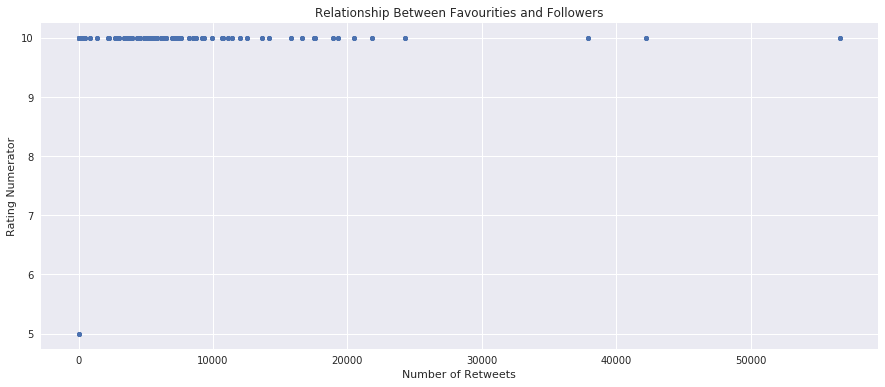

In [61]:
#Examine the relationship between retweet and follower
sn.set(rc={"figure.figsize":(18, 6)})
chi2.plot.scatter(y='rating_numerator', x='retweet_count', figsize=[15,6])
plt.xlabel('Number of Retweets')
plt.ylabel('Rating Numerator')
plt.title('Relationship Between Favourities and Followers')

### Insight 2: Which are the most common dog stage?

Text(0.5,1,'The Most Common Dog Stage')

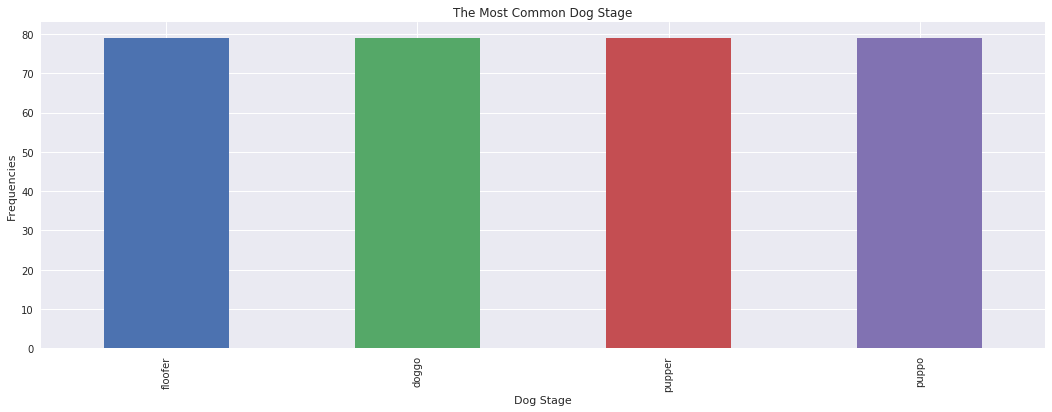

In [62]:
#Top 10 Most Popular Dog Names
chi2['Dog Stage'].value_counts().head(10).plot.bar()
plt.xlabel('Dog Stage')
plt.ylabel('Frequencies')
plt.title('The Most Common Dog Stage')

### Insight 3: What are the percentage of Dog Rate Tweet per Calendar Month

Text(0,0.5,'Percentage of Dog Rate Tweet')

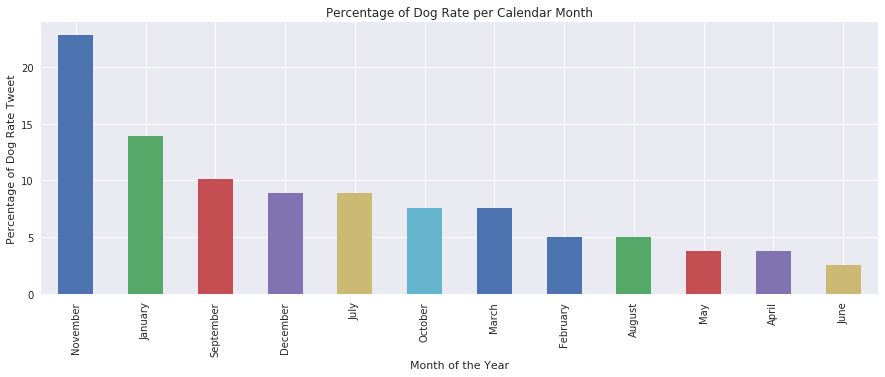

In [63]:
#Create a bar chart that shows percentage of dog rate tweet per each calendar month
chi2['timestamp'].dt.month_name().value_counts(normalize=True).mul(100).round(2).plot.bar(figsize=[15,5])
plt.title('Percentage of Dog Rate per Calendar Month')
plt.xlabel("Month of the Year")
plt.ylabel("Percentage of Dog Rate Tweet")

### Insight 4: What is percentage of dog rate tweet per each day of the week?

Text(0,0.5,' ')

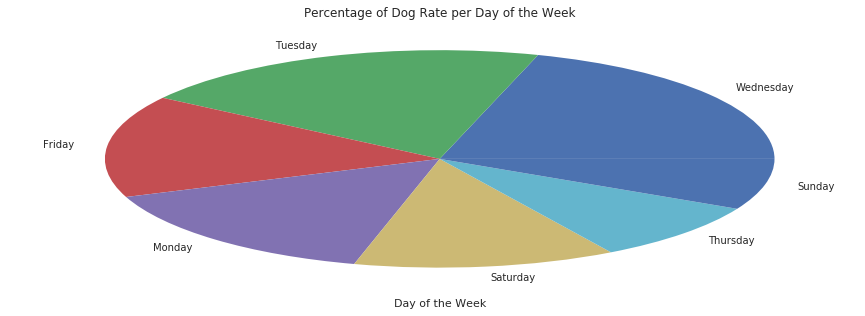

In [102]:
#Iinsight 4
#Create a pie chart that shows percentage of dog rate tweet per each calendar month
chi2['timestamp'].dt.day_name().value_counts(normalize=True).mul(100).round(2).plot.pie(figsize=[15,5])
plt.title('Percentage of Dog Rate per Day of the Week')
plt.xlabel("Day of the Week")
plt.ylabel(" ")

#plt.ylabel("Percentage of Dog Rate Tweet")

### Insight 5: The Percentage of Numerator's Rating

Text(0.5,0,'Ratings')

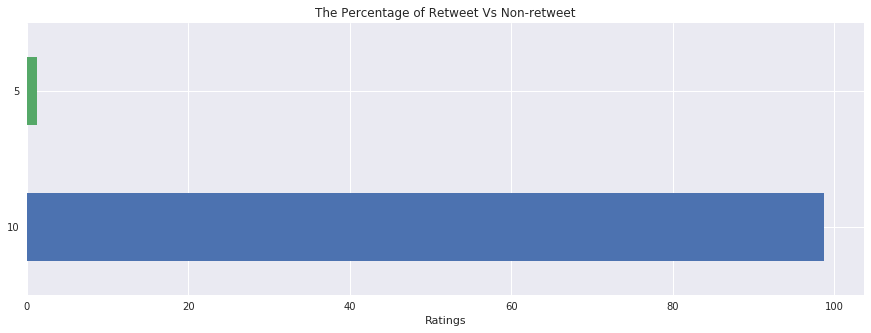

In [89]:
chi2.rating_numerator.value_counts(normalize=True).mul(100).round(2).plot.barh(figsize=[15,5])

plt.title('The Percentage of Rating Numerator')
plt.xlabel('Percentage of Rating (%)')
plt.xlabel('Ratings')